__Data description:__ https://thinkful-ed.github.io/data-201-resources/ESS_practice_data/ESS_codebook.html

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

In [3]:
sns.set_style('darkgrid')

PATH = "https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/ESS_practice_data/ESSdata_Thinkful.csv"
df = pd.read_csv(PATH)

print(df.head())
print(df.cntry.unique())

  cntry  idno  year  tvtot  ppltrst  pplfair  pplhlp  happy  sclmeet  sclact  \
0    CH   5.0     6    3.0      3.0     10.0     5.0    8.0      5.0     4.0   
1    CH  25.0     6    6.0      5.0      7.0     5.0    9.0      3.0     2.0   
2    CH  26.0     6    1.0      8.0      8.0     8.0    7.0      6.0     3.0   
3    CH  28.0     6    4.0      6.0      6.0     7.0   10.0      6.0     2.0   
4    CH  29.0     6    5.0      6.0      7.0     5.0    8.0      7.0     2.0   

   gndr  agea  partner  
0   2.0  60.0      1.0  
1   2.0  59.0      1.0  
2   1.0  24.0      2.0  
3   2.0  64.0      1.0  
4   2.0  55.0      1.0  
['CH' 'CZ' 'DE' 'ES' 'NO' 'SE']


## Fun with categorical variables

In [4]:
#making dummies & creating df to hold features
features = pd.get_dummies(df['cntry'])

#Nordic countries dummy
features['Nordic'] = np.where((df['cntry'].isin(['NO','SE',])), 1, 0)

print(pd.crosstab(features['Nordic'], df['cntry']))

cntry     CH    CZ  DE    ES    NO    SE
Nordic                                  
0       1546  1316  28  2426     0     0
1          0     0   0     0  1462  1816


## Changing variable types

In [6]:
features['Adult_65plus'] = np.where(df['agea']>=65, 1, 0)

#check to make sure it worked
print(df['agea'].groupby(features['Adult_65plus']).describe())

               count       mean        std   min   25%   50%   75%    max
Adult_65plus                                                             
0             6682.0  40.874738  13.958596  15.0  29.0  42.0  53.0   64.0
1             1673.0  73.815302   6.650086  65.0  69.0  72.0  78.0  114.0


## Drill

Categorize each of the variables in the ESS dataset as categorical or continuous, and if continuous as ordinal, interval, or ratio variables

cntry - categorical

idno - continuous interval

year - categorical

tvtot - categorical

ppltrst - categorical

pplfair - categorical

pplhlp - categorical

happy - categorical

sclmeet - categorical

sclact - categorical

gndr - categorical

agea - continuous ratio

partner - categorical


## Combining two or more highly-correlated variables

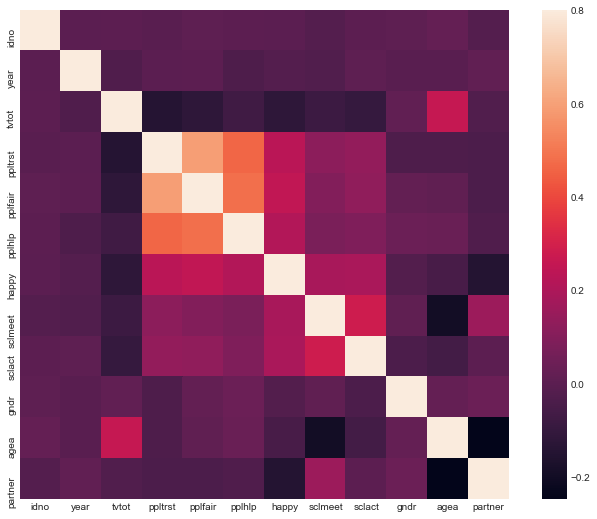

                  ppltrst   pplfair    pplhlp  trust_fair_help
ppltrst          1.000000  0.592001  0.462562         0.834209
pplfair          0.592001  1.000000  0.480918         0.841674
pplhlp           0.462562  0.480918  1.000000         0.789318
trust_fair_help  0.834209  0.841674  0.789318         1.000000


In [12]:
corrmat = df.corr()

f, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

#pplfair, ppltrst, pplhlp are closely correlated (redundant) -> average them
#To handle variables on different scales ie on is 0 to 100, another is 0 to 7
    #scale them by subtracting the average of each variable from all values in that
    #variable and divide by standard deviation

means = df[['ppltrst','pplfair','pplhlp']].mean(axis=0)
stds = df[['ppltrst','pplfair','pplhlp']].std(axis=0)
features['trust_fair_help'] = ((df[['ppltrst','pplfair','pplhlp']] - means) / stds).mean(axis=1)

#check how well the composite correlates with each of the individual variables
plotdf = df.loc[:, ['ppltrst','pplfair','pplhlp']]
plotdf['trust_fair_help'] = features['trust_fair_help']
corrmat2 = plotdf.corr()

print(corrmat2)